# Dietary Evaluation with Machine Learning

### Introduction:
This project aims to assist bodybuilders in making optimal dietary choices through machine learning. It was done purely for studying purposes, and to increase my knowledge on Data Science.\
The dataset underwent some preprocessing, including the removal of many columns, removal of rows with missing data and randomization. These are not included in the notebook.

<br />

### Labeling Process:
An experienced friend collaborated to label foods as "Good/1" (worth it) or "Bad/0" (not worth it) based on their fitness value.

<br />

### Model Development:
I developed machine learning models utilizing the preprocessed dataset to predict food worthiness. Various algorithms were explored to identify the most effective approach.



### Imports and file reading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("food_db_clean.csv", sep="\t")

### Cleaning and exploratory analysis

In [ ]:
df.head(4)

,cal,fat,ch,sugar,protein,label
0,582,"49,8","24,07","2,73","19,33",0.0
1,52,"2,26","7,1","2,68","1,87",1.0
2,275,"3,41","52,2","0,58","9,56",1.0
3,47,"3,2","2,8",0,"1,8",1.0


In [ ]:
# Convert columns to numeric
df['fat'] = df['fat'].str.replace(',', '.').astype(float)
df['ch'] = df['ch'].str.replace(',', '.').astype(float)
df['sugar'] = df['sugar'].str.replace(',', '.').astype(float)
df['protein'] = df['protein'].str.replace(',', '.').astype(float)

In [ ]:
# Changing label values to Good and Bad
df['label'] = df['label'].map({1: "Good", 0: "Bad"})
type(df["label"][0])

str

In [ ]:
df["label"].value_counts() # about 30/70% rate

Bad     279
Good    125
Name: label, dtype: int64

In [ ]:
len(df)

12378

In [ ]:
# Removing undone labels
df = df.dropna(subset=['label'])

In [ ]:
len(df)

404

In [ ]:
df.dtypes

cal          int64
fat        float64
ch         float64
sugar      float64
protein    float64
label       object
dtype: object

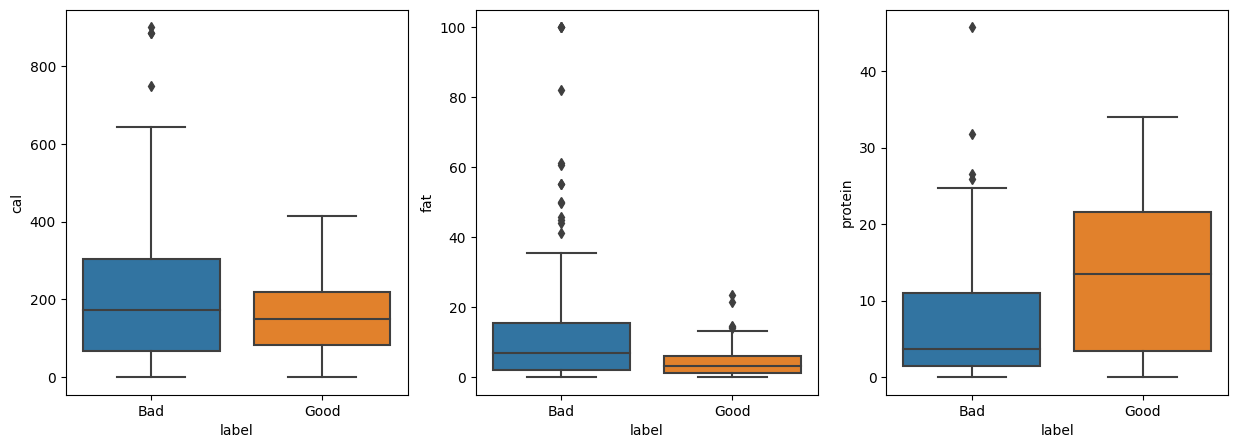

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='label', y='cal', data=df, ax=axes[0])
sns.boxplot(x='label', y='fat', data=df, ax=axes[1])
sns.boxplot(x='label', y='protein', data=df, ax=axes[2])

plt.show()

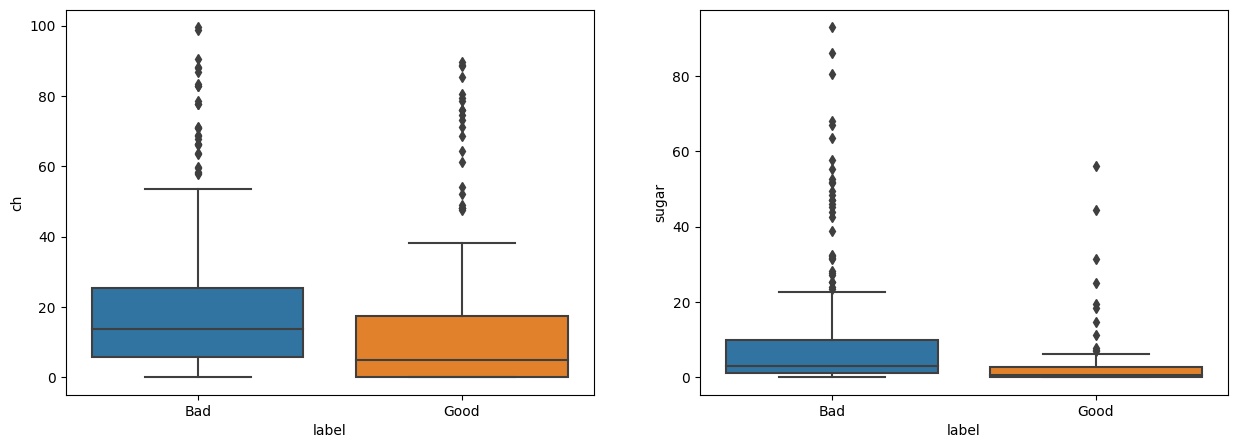

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='label', y='ch', data=df, ax=axes[0])
sns.boxplot(x='label', y='sugar', data=df, ax=axes[1])

plt.show()

We can see that some values are different with the individual labels. It shows us that there is meaning behind them and that they are not random.

In [ ]:
# Split the data into training and test sets in an 80/20 ratio
from sklearn.model_selection import train_test_split

features = ["cal", "fat", "ch", "sugar", "protein"]
X = df.loc[:, features]
y = df.loc[:, ["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Basic Models

First off, I am trying some basic models without doing any changes to the data, like normalizing, or standardizing.

###Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
score = dummy_clf.score(y_pred, y_test)

print(f"Accuracy: {score:.3f}")

Accuracy: 0.728


In [ ]:
report = classification_report(y_test, y_pred, zero_division=0.0)
print(report)

              precision    recall  f1-score   support

         Bad       0.73      1.00      0.84        59
        Good       0.00      0.00      0.00        22

    accuracy                           0.73        81
   macro avg       0.36      0.50      0.42        81
weighted avg       0.53      0.73      0.61        81



### Different classifiers

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define classifiers and their names
names = [
    "K-Nearest Neighbors",
    "Linear Support Vector Machine",
    "Radial Basis Function Support Vector Machine (RBF SVM)",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Network",
    "AdaBoost",
    "Naive Bayes",
    "Quadratic Discriminant Analysis (QDA)",
]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(
        random_state=42
    ),
    MLPClassifier(max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


In [ ]:
def predict(X_train, X_test, y_train, y_test):
  for name, clf in zip(names, classifiers):
      clf.fit(X_train, np.ravel(y_train))
      y_pred = clf.predict(X_test)
      score = clf.score(X_test, np.ravel(y_test))
      print(name)
      print(f"Accuracy: {score:.3f}")
      report = classification_report(np.ravel(y_test), y_pred, zero_division=0.0)
      print("Classification report:")
      print(report)
      print("-"*30)

In [ ]:
predict(X_train, X_test, y_train, y_test)

K-Nearest Neighbors
Accuracy: 0.778
Classification report:
              precision    recall  f1-score   support

         Bad       0.84      0.86      0.85        59
        Good       0.60      0.55      0.57        22

    accuracy                           0.78        81
   macro avg       0.72      0.70      0.71        81
weighted avg       0.77      0.78      0.77        81

------------------------------
Linear Support Vector Machine
Accuracy: 0.864
Classification report:
              precision    recall  f1-score   support

         Bad       0.88      0.95      0.91        59
        Good       0.82      0.64      0.72        22

    accuracy                           0.86        81
   macro avg       0.85      0.79      0.81        81
weighted avg       0.86      0.86      0.86        81

------------------------------
Radial Basis Function Support Vector Machine (RBF SVM)
Accuracy: 0.728
Classification report:
              precision    recall  f1-score   support

       

## Normalization and standardization

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.fit_transform(X_test)

predict(X_train_normalized, X_test_normalized, y_train, y_test)

K-Nearest Neighbors
Accuracy: 0.802
Classification report:
              precision    recall  f1-score   support

         Bad       0.85      0.88      0.87        59
        Good       0.65      0.59      0.62        22

    accuracy                           0.80        81
   macro avg       0.75      0.74      0.74        81
weighted avg       0.80      0.80      0.80        81

------------------------------
Linear Support Vector Machine
Accuracy: 0.728
Classification report:
              precision    recall  f1-score   support

         Bad       0.73      1.00      0.84        59
        Good       0.00      0.00      0.00        22

    accuracy                           0.73        81
   macro avg       0.36      0.50      0.42        81
weighted avg       0.53      0.73      0.61        81

------------------------------
Radial Basis Function Support Vector Machine (RBF SVM)
Accuracy: 0.802
Classification report:
              precision    recall  f1-score   support

       

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

predict(X_train_scaled, X_test_scaled, y_train, y_test)

K-Nearest Neighbors
Accuracy: 0.864
Classification report:
              precision    recall  f1-score   support

         Bad       0.90      0.92      0.91        59
        Good       0.76      0.73      0.74        22

    accuracy                           0.86        81
   macro avg       0.83      0.82      0.83        81
weighted avg       0.86      0.86      0.86        81

------------------------------
Linear Support Vector Machine
Accuracy: 0.728
Classification report:
              precision    recall  f1-score   support

         Bad       0.73      1.00      0.84        59
        Good       0.00      0.00      0.00        22

    accuracy                           0.73        81
   macro avg       0.36      0.50      0.42        81
weighted avg       0.53      0.73      0.61        81

------------------------------
Radial Basis Function Support Vector Machine (RBF SVM)
Accuracy: 0.852
Classification report:
              precision    recall  f1-score   support

       

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train_standardized = standardizer.fit_transform(X_train)
X_test_standardized = standardizer.fit_transform(X_test)

predict(X_train_standardized, X_test_standardized, y_train, y_test)

K-Nearest Neighbors
Accuracy: 0.840
Classification report:
              precision    recall  f1-score   support

         Bad       0.91      0.86      0.89        59
        Good       0.68      0.77      0.72        22

    accuracy                           0.84        81
   macro avg       0.80      0.82      0.81        81
weighted avg       0.85      0.84      0.84        81

------------------------------
Linear Support Vector Machine
Accuracy: 0.852
Classification report:
              precision    recall  f1-score   support

         Bad       0.84      0.98      0.91        59
        Good       0.92      0.50      0.65        22

    accuracy                           0.85        81
   macro avg       0.88      0.74      0.78        81
weighted avg       0.86      0.85      0.84        81

------------------------------
Radial Basis Function Support Vector Machine (RBF SVM)
Accuracy: 0.840
Classification report:
              precision    recall  f1-score   support

       

### Hyperparameter tuning

Now that we have a good model, let's try tuning it to give even better results

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This code runs for about 7 mins

from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'activation': ['relu', 'tanh'],
    'max_iter': [1000, 5000],
    'random_state': [42]
}

data_versions = {
    'Original': (X_train, X_test),
    'Normalized': (X_train_normalized, X_test_normalized),
    'Scaled': (X_train_scaled, X_test_scaled),
    'Standardized': (X_train_standardized, X_test_standardized)
}

for version, (X_train_version, X_test_version) in data_versions.items():
    grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_version, np.ravel(y_train))

    print(f"\nBest Hyperparameters ({version}):", grid_search.best_params_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_version)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Set Accuracy ({version}):", accuracy)


Best Hyperparameters (Original): {'activation': 'tanh', 'alpha': 0.0001, 'max_iter': 1000, 'random_state': 42}
Test Set Accuracy (Original): 0.8518518518518519

Best Hyperparameters (Normalized): {'activation': 'relu', 'alpha': 0.01, 'max_iter': 1000, 'random_state': 42}
Test Set Accuracy (Normalized): 0.8765432098765432

Best Hyperparameters (Scaled): {'activation': 'relu', 'alpha': 0.0001, 'max_iter': 1000, 'random_state': 42}
Test Set Accuracy (Scaled): 0.8641975308641975

Best Hyperparameters (Standardized): {'activation': 'tanh', 'alpha': 1.0, 'max_iter': 1000, 'random_state': 42}
Test Set Accuracy (Standardized): 0.8765432098765432


### Try it yourself

In [ ]:
best = MLPClassifier(activation="relu", alpha=0.01, max_iter=1000, random_state=42)
best.fit(X_train_normalized, np.ravel(y_train))

MLPClassifier(alpha=0.01, max_iter=1000, random_state=42)

In [ ]:
# Write in the values you want to try
features = {
    'calories': 300,
    'fat': 10,
    'carbohydrates': 10,
    'sugar': 2,
    'protein': 3
}

values = np.array([[features[feature] for feature in features]])
best_pred = best.predict(values)
print(f"Predicted label: {best_pred[0]}")

Predicted label: Bad
